In [76]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [77]:
X, y = load_boston(return_X_y = True)

In [78]:
df = pd.DataFrame(X)

In [79]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [80]:
df_ChosenOnes = df[[6,11]]

In [81]:
df_ChosenOnes.head()

,6,11
0,65.2,396.90
1,78.9,396.90
2,61.1,392.83
3,45.8,394.63
4,54.2,396.90


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c7b3e5ad0>,
      dtype=object)

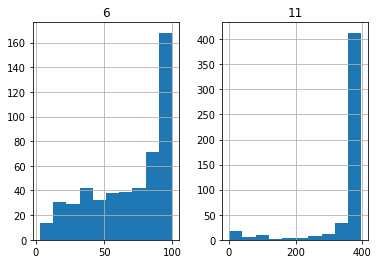

In [82]:
df_ChosenOnes.hist()

In [83]:
# Regression of the sixth column:
X_six = df_ChosenOnes[6].values[:,np.newaxis]
lr_six = LinearRegression().fit(X_six, y)
print(f"Regression score {math.sqrt( lr_six.score(X_six, y) )}")

# Regression of the eleventh column:
X_eleven = df_ChosenOnes[11].values[:,np.newaxis]
lr_eleven = LinearRegression().fit(X_eleven,y)
print(f"Correlation score {math.sqrt( lr_eleven.score(X_eleven, y) )}")


Regression score 0.3769545650045963
Correlation score 0.3334608196570667


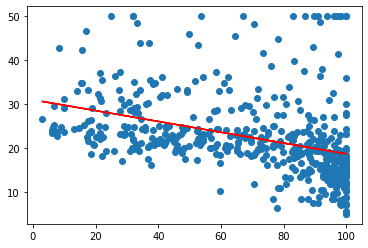

In [84]:
# Plot of sixth column:
plt.scatter(X_six,y)
plt.plot(X_six, lr_six.predict(X_six), color = 'red')

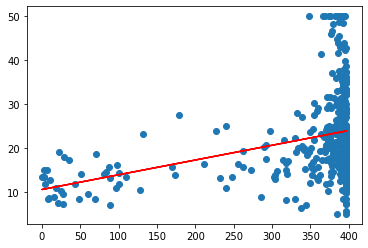

In [85]:
# Plot of eleventh column:
plt.scatter(X_eleven, y)
plt.plot(X_eleven, lr_eleven.predict(X_eleven), color = 'red')

In [86]:
# It is clearly visible on second plot, that most of the input values
# of the eleventh column are between 360 and 400.
# Let's zoom in to see whether linear regression tells us more about
# behavoiur of given target in that range.
idx = [i for i, x in enumerate(X_eleven) if x > 360]
X_eleven_zoom = X_eleven[idx]
y_zoom = y[idx]

In [87]:
X_eleven_zoom.size
# It shows over 80% percent of given input is located
# in that short range.

410

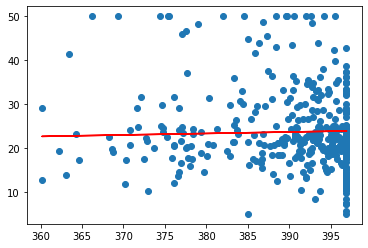

In [88]:
plt.scatter(X_eleven_zoom, y_zoom)
plt.plot(X_eleven_zoom, lr_eleven.predict(X_eleven_zoom), color = 'red')

In [89]:
X_eleven[ X_eleven > 396].size

132

In [90]:
# There's actually 132 points that x-value is larger than 397.
# With number of 506 of input values and it's range of 0-400
# it's huge aberration.


In [75]:
# Conclusions

# Sixth column:
# For small values it seems to be positive and strong correlation 
# between predicted model and the target but R coefficient of whole set
# (approx 0.38), indicates there is only moderate correlation. 
# Generated histogram shows input data is not distributed evenly.

# Eleventh column:
# Conclusion is the same as for sixth column.
# For small values it seems to be visible positive and strong 
# corelation between predicted model and the target but R coefficient 
# of whole set (approx 0.33), indicates there is only moderate corre-
# lation. 
# Input data is not evenly distributed. 132 input values are greater
# than 397 (in 0-400 value range with size of set = 506) 